### （３章　続き）

#### 多層パーセプトロン
XORゲートをパーセプトロンによって再現することを考える。  
パーセプトロンの入出力は次の通り。

$x_{1}$|$x_{2}$|y
-:-|-:-|-:-
0|0|0
0|1|1
1|0|1
1|1|0

これは線形分離不可能であり、一層パーセプトロンでは再現できない。  
例として、次のように分類を試みると失敗する。  

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

np.random.seed(0)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential([
    #Dense(input_dim=2, output_dim=1),
    Dense(units=1, input_dim=2), # keras v2.0へのアップデートに伴う変更
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X,Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.8427     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.8205     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8049     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7924     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7822     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.7754     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.7688     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.7622     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.7578     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.7555     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.7520     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.7497     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.7468     
Epoch 14/200
4/4 [================

パーセプトロンの多層化によりXORゲートを実現することを考える。  
XORゲートの入出力表は次の通り。
  
$x_{1}$|$x_{2}$||$y$
-:-|-:-||-:-
0|0||0
0|1||1
1|0||1
1|1||0

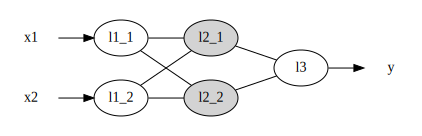

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.node_attr['arrowhead']='none'
dot.graph_attr['rankdir']='LR'

with dot.subgraph(name='cluster_0', graph_attr={'style': 'invis'}) as c0:
    c0.node('x1','x1', shape='plaintext')
    c0.edge('x1', 'l1_1')
    c0.node('l2_1', 'l2_1', style='filled')
    c0.edge('l1_1', 'l2_1', arrowhead='none')
    
with dot.subgraph(name='cluster_1', graph_attr={'style': 'invis'}) as c1:
    c1.node('x2','x2', shape='plaintext')
    c1.edge('x2', 'l1_2')
    c1.node('l2_2', 'l2_2', style='filled')
    c1.edge('l1_2', 'l2_2', arrowhead='none')

dot.edge('l1_1','l2_2', arrowhead='none')
dot.edge('l1_2','l2_1', arrowhead='none')
dot.edge('l2_1','l3', arrowhead='none')
dot.edge('l2_2','l3', arrowhead='none')
dot.node('y','y', shape='plaintext')
dot.edge('l3','y')

dot.body.append('{rank=min; x1; x2;}')
dot


１層パーセプトロンに上記のような隠れ層（図中では灰色のノードが属する）を追加し、  
入力 $X=(x_{1}, x_{2})^{\mathrm{T}}$ に対して以下の式により出力 $y$ を返す。  
  
\begin{align*}
h_{1} &= f(w_{11}x_{1} +w_{12}x_{2} + b_{1}) \\
h_{2} &= f(w_{21}x_{1} +w_{22}x_{2} + b_{2}) \\
y &= f(v_{1}h_{1} + v_{2}h_{2} + c)
\end{align*}

ここで $f()$ はステップ関数、  
$V=(v_{1}, v_{2})^{\mathrm{T}}, \, c$ は隠れ層から出力層への重みベクトルおよびバイアスである。    
  
このとき、例えば以下のようなパラメータはXORゲートとして正しい出力を与える。  

\begin{align*}
W&=\left( \begin{array}{cc}
w_{11}& w_{12}\\
w_{21}& w_{22}
\end{array}
\right) = \left( \begin{array}{cc}
2& 2\\
-2& -2
\end{array} \right) \\
b&=\left( \begin{array}{c}
b_{1}\\
b_{2}
\end{array}
\right) = \left( \begin{array}{c}
-1\\
3
\end{array}
\right) \\
V&=\left( \begin{array}{c}
v_{1}\\
v_{2}
\end{array}
\right) = \left( \begin{array}{c}
2\\
2
\end{array}
\right) \\
c &= -3
\end{align*}

$x_{1}$ | $x_{2}$ | $h_{1}$ | $h_{2}$ | $v_{1}h_{1} + v_{2}h_{2}+c$ || $y$
-:-|-:-|-:-|-:-|-:-||-:-
0|0|-1|1|-3||-1
0|1|1|1|1||1
1|0|1|1|1||1
1|1|1|-1|-3||-1


#### モデル化

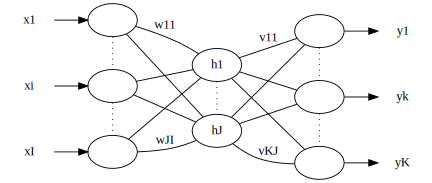

In [8]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="6,6"

with dot.subgraph(name='b_0_0') as c00:
    c00.node('x1', 'x1', shape='plaintext')
    c00.node('l11', '')
    c00.edge('x1', 'l11')
    c00.node('l21', '')
    c00.node('y1', 'y1', shape='plaintext')
    c00.edge('l21', 'y1')
with dot.subgraph(name='b_0_1') as c01:
    c01.node('xi', 'xi', shape='plaintext')
    c01.node('l1i', '')
    c01.edge('xi', 'l1i')
    c01.node('l2k', '')
    c01.node('yk', 'yk', shape='plaintext')
    c01.edge('l2k', 'yk')
with dot.subgraph(name='b_0_2') as c02:
    c02.node('xI', 'xI', shape='plaintext')
    c02.node('l1I', '')
    c02.edge('xI', 'l1I')
    c02.node('l2K', '')
    c02.node('yK', 'yK', shape='plaintext')
    c02.edge('l2K', 'yK')
with dot.subgraph(name='b_1_0') as c10:
    c10.node('h1', 'h1')
    c10.node('hJ', 'hJ')
    
    
dot.edge('l11', 'h1', arrowhead='none', label='w11')
dot.edge('l1i', 'h1', arrowhead='none')
dot.edge('l1I', 'h1', arrowhead='none')
dot.edge('l11', 'hJ', arrowhead='none')
dot.edge('l1i', 'hJ', arrowhead='none')
dot.edge('l1I', 'hJ', arrowhead='none', label='wJI')

dot.edge('h1', 'l21', arrowhead='none', label='v11')
dot.edge('h1', 'l2k', arrowhead='none')
dot.edge('h1', 'l2K', arrowhead='none')
dot.edge('hJ', 'l21', arrowhead='none')
dot.edge('hJ', 'l2k', arrowhead='none')
dot.edge('hJ', 'l2K', arrowhead='none', label='vKJ')
    
dot.edge('l11', 'l1i', style='dotted', arrowhead='none')
dot.edge('l1i', 'l1I', style='dotted', arrowhead='none')
dot.edge('h1', 'hJ', style='dotted', arrowhead='none')
dot.edge('l21', 'l2k', style='dotted', arrowhead='none')
dot.edge('l2k', 'l2K', style='dotted', arrowhead='none')

dot.body.append('{rank=min; x1; xi; xI;}')
dot.body.append('{rank=same; l11; l1i; l1I;}')
dot.body.append('{rank=same; h1; hJ;}')
dot.body.append('{rank=same; l21; l2k; l2K;}')
dot.body.append('{rank=max; y1; yk; yK;}')
    
dot

入力 $X = (x_{1}, \dots, x_{I})^{\mathrm{T}}$ を受ける３層パーセプトロンについて考える。  
　（層の数え方は書籍の記述に従っている）  

隠れ層における出力 $H = (h_{1}, \dots, h_{J})^{\mathrm{T}}$ は、  
重み $W$ 、バイアス $B = (b_{1}, \dots, b_{J})^{\mathrm{T}}$ 、活性化関数 $f$ に対し　　

\begin{align*}
H = f(WX + B)
\end{align*}

と書ける。同様にして、出力層における出力 $Y = (y_{1}, \dots, y_{K})^{\mathrm{T}})$ は、  
重み $V$ 、バイアス $C = (c_{1}, \dots, c_{K})$ 、活性化関数 $g$ に対し    

\begin{align*}
Y = g(WH + C)
\end{align*}

と書くことができる。  

---
勾配降下法を適用するため、各パラメータに対する勾配を求める。

データセットのうちn番目のデータによって求めた誤差を $E_{n}$ とする。
各層の活性化前の値をそれぞれ

\begin{align*}
p := WX + B
q := VH + C
\end{align*}

とおく。  
$W = (w_{1}, \dots, w_{J})^{\mathrm{T}}$ および $V = (v_{1}, \dots, v_{K})^{\mathrm{T}}$ に対して  

\begin{eqnarray*}
\begin{cases}
\frac{\partial E_{n}}{\partial w_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}\frac{\partial p_{j}}{\partial w_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}X \\
\frac{\partial E_{n}}{\partial B_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}\frac{\partial p_{j}}{\partial B_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}
\end{cases} \\
 \\
\begin{cases}
\frac{\partial E_{n}}{\partial v_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial v_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}H \\
\frac{\partial E_{n}}{\partial C_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial C_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}
\end{cases}
\end{eqnarray*}

となるから、$\frac{\partial E_{n}}{\partial p_{j}}$ および $\frac{\partial E_{n}}{\partial q_{k}}$ がわかれば十分である。

さて、先ほどの多クラスロジスティック回帰と同様に  
隠れ層->出力層の伝播にソフトマックス関数を使うならば、  

\begin{align*}
\frac{\partial E_{n}}{\partial q_{k}} = -(t_{k} - y_{k})
\end{align*}

が得られる。
$ \frac{\partial E_{n}}{\partial p_{j}} $ について偏微分の連鎖率を用いて、

\begin{align*}
\frac{\partial E_{n}}{\partial p_{j}} &= \sum_{k=1}^{K}\frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial p_{j}} \\
&= \sum_{k=1}^{K}\frac{\partial E_{n}}{\partial q_{k}} \left( f^{\prime}(p_{j})v_{kj} \right)
\end{align*}

となる。

---
>（以下の節は、  
[誤差逆伝播法のノート](https://qiita.com/Ugo-Nama/items/04814a13c9ea84978a4c)、および  
Michael Nielsen著 [「ニューラルネットワークと深層学習」　Chapter 2](http://nnadl-ja.github.io/nnadl_site_ja/chap2.html)を参照した。）

いま、L層パーセプトロンについて一般化し、  
第$l$層が前の層から入力 $a^{l-1}$ を受けて出力 $a^{l}$ を次の層に送るとする。  
  
第$l-1$層$k$番目のニューロンから第$l$層$j$番目のニューロンへの接続の重みを $w^{l}_{jk}$ と表記し、  
第$l$層$j$番目のニューロンのバイアスを $b^{l}_{j}$、活性を $a^{l}_{j}$ とする。  
活性化関数が $f$ であるとき、

\begin{align*}
a^{l}_{j} = f \left( \sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j} \right)
\end{align*}

となる。この式を行列で書き直すため、各層に対し  

\begin{align*}
&\text{重み行列} & w^{l} | w^{l}(j,k) = w^{l}_{jk} \\
&\text{バイアスベクトル} &　b^{l} = (b^{l}_{1}, \dots, b^{l}_{j}, \dots) \\
&\text{活性ベクトル} & a^{l} = (a^{l}_{1}, \dots, a^{l}_{j}, \dots)
&\end{align*}

と定義すると、次のように書き直すことができる。

\begin{align*}
a^{l} = f(w^{l}a^{l-1} + b^{l})
\end{align*}

また、活性化関数への代入値を重み付き入力と呼び、

\begin{align*}
z^{l} = w^{l}a^{l-1} + b^{l} = \sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j}
\end{align*}

とする。

誤差関数の値をCとする。  
（例えばj番目の入力に対する正解が $t_{j}$ 、二乗誤差関数を用いるとき  
$C = \frac{1}{2}||t-a^{L}||^{2} = \frac{1}{2}\sum_{j}(t_{j} - a^{L}_{j})^{2}$ である）  
  
第l層j番目のニューロンの重み付き入力に小さな変更 $ \Delta z^{l}_{j}$ を加えると  
ニューロンの出力は $f(z^{l}_{j} + \Delta z^{l}_{j})$ となり、  
全体のコスト関数の値は $\frac{\partial C}{\partial z^{l}_{j}} \Delta z^{l}_{j}$ だけ変化する。  
 $ \Delta z^{l}_{j}$ を適切に選んで誤差関数の値を改善することを考える。  
  
ここで、第l層j番目のニューロンの誤差 $\delta^{l}_{j}$ を次のように定義する。

\begin{align*}
\delta^{l}_{j} := \frac{\partial C}{\partial z^{l}_{j}}
\end{align*}

出力層での誤差 $\delta^{L}$ の各要素は次の通り。

\begin{align*}
\delta^{L}_{j} = \frac{\partial C}{\partial a^{L}_{j}}f^{\prime}(z^{L}_{j})
\end{align*}

これを行列として表記するとき、アダマール積を $\odot$ で表して

\begin{align*}
\delta^{L} = \nabla_{a}C \odot f^{\prime}(z^{L})
\end{align*}

ただし $\nabla_{a} C$ は偏微分 $\frac{\partial L}{\partial a^{L}_{j}}$ を並べたベクトルである。  
  
誤差 $\delta^{l}$ と $\delta^{l+1}$ の関係は次のように表せる。  

\begin{align*}
\delta^{l} = ((w^{l+1})^{\mathrm{T}} \delta^{l+1}) \odot f^{\prime}(z^{l})
\end{align*}

これらの式を逐次適用し $\delta^{L-1}, \delta^{L-2}, \dots$ と求めることで、任意の層lでの誤差 $\delta^{l}$ を求めることができる。  
（本式が誤差を逆方向に伝播させているように見えることが、誤差逆伝播法の名前の由来とされている）  
  
バイアスについては

\begin{align*}
\frac{\partial C}{\partial b^{l}_{j}} = \delta^{l}_{j}
\end{align*}

すなわち

\begin{align*}
\frac{\partial C}{\partial b} = \delta
\end{align*}

と書くことができる。
  
重みについては

\begin{align*}
\frac{\partial C}{\partial w^{l}_{jk}} = a^{l-1}_{k} \delta^{l}_{j}
\end{align*}

であり、

\begin{align*}
\frac{\partial C}{\partial w} = a_{in} \delta_{out}
\end{align*}

と書き直すことができる。  

以上を用いて、逆伝播のアルゴリズムは次のようになる。
>1.input  
　入力層に対応する活性 $a^{1}$ をセットする  
>2.Feedforward  
　各 $l=2,3,\dots,L$ に対し、$z^{l} = w^{l}a^{l-1} + b^{l}$ と $a^{l} = f(z^{l})$ を計算する  
>3.Output error $\delta^{L}$  
　誤差ベクトル $\delta^{L} = \nabla_{a}C \odot f^{\prime}(z^{L})$ を計算する  
>4.Backpropagate the error  
　各 $l=L-1, L-2, \dots, 2$ に対し、$\delta^{l} = ((w^{l+1})^{\mathrm{T}} \delta^{l+1}) \odot f^{\prime}(z^{l})$ を計算する  
>5.output  
　誤差関数の勾配は $\frac{\partial C}{\partial w^{l}_{jk}} = a^{l-1}_{k} \delta^{l}_{j}$ と $\frac{\partial C}{\partial b^{l}_{j}} = \delta^{l}_{j}$ で得られる  

このアルゴリズムをミニバッチ学習に対する勾配降下法の適用する手順は次の通り。
>1.Input a set of training examples  
  
>2.For each training example x:   
　対応する活性 $a^{x,l}$ をセットし、以下のステップを行う  
　・Feedforward  
　　　$l=2,3,\dots,L$ に対し、$z^{x,l} = w^{l}a^{x,l-1}+b^{l}$ と $ a^{x,l}=f(z^{x,l})$ を計算する  
　・Output error \delta^{x,L}  
　　　誤差ベクトル $\delta^{x,L} = \nabla_{a}C_{x} \odot f^{\prime}(z^{x,L})$ を計算する  
　・Backpropagate the error  
　　　$l=L-1, L-2, \dots, 2$ に対し、$\delta^{x,l} = ((w^{l+1})^{\mathrm{T}} \delta^{x,l+1}) \odot f^{\prime}(z^{x,l})$ を計算する  
>3.Gradient descent  
　$l=L, L-1, \dots, 2$ に対し、重みとバイアスを  
　$w^{l} \rightarrow w^{l} - \frac{\eta}{m}\sum_{x} \delta^{x,l} (a^{x,l-1})^{\mathrm{T}}$   
　$b^{l} \rightarrow b^{l} - \frac{\eta}{m}\sum_{x} \delta^{x,l}$  
　で更新する  

---
WIP

---
#### 実装